# Model selection

## Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

## Load data

In [25]:
# leer data
data_m = pd.read_csv('../../data/processed/data_m_v2.csv')
data_f = pd.read_csv('../../data/processed/data_f_v2.csv')


In [26]:
data_m

,edad,peso,talla,per_brazo_rel,per_brazo_ten,per_antebrazo,per_torax,per_cintura,per_cadera,per_muslo_max,per_muslo_medial,per_pantorrilla,masa_piel,masa_adiposa,masa_muscular,masa_residual,masa_osea,peso_porcentaje
0,-1.036390,-1.129647,-1.041523,-0.245085,-0.364953,-0.791100,-0.661568,-1.015423,-1.182268,-1.117874,-1.535150,-1.224345,0.052860,0.253409,0.478151,0.105383,0.110197,1.016963
1,-0.425749,-1.106688,0.645564,-1.516202,-2.004565,-1.668563,-2.015216,-1.005378,-0.498441,-1.117874,-1.422207,-0.332794,0.054644,0.352585,0.367398,0.092668,0.132705,1.028239
2,0.033609,1.495342,-1.424952,3.133412,2.974995,2.718753,1.299323,1.355101,1.642233,2.023883,2.033875,1.681451,0.039291,0.366312,0.388463,0.107386,0.098548,1.065902
3,-0.378883,0.576979,-0.581408,0.357024,0.788847,0.757365,0.413759,0.551533,0.675956,0.750198,0.633371,1.483329,0.044419,0.311746,0.418139,0.109605,0.116092,1.038759
4,0.297577,-0.326079,0.338821,0.055969,0.667394,0.602518,-0.092277,-0.000919,-0.394381,-0.948049,-0.518656,-0.762059,0.050664,0.228280,0.482941,0.125027,0.113088,1.013803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,-1.340331,-2.178113,-0.734780,-1.783806,-1.609843,-1.823410,-2.154376,-2.150461,-2.371532,-2.285419,-2.619411,-2.776305,0.063539,0.240454,0.450196,0.104182,0.141629,0.974093
149,-0.919913,-1.091382,-1.041523,-0.010932,-0.243501,-0.326561,-0.408550,-0.854709,-1.122805,-0.948049,-0.902665,-1.158304,0.051798,0.237287,0.494874,0.108401,0.107640,1.033369
150,0.968523,0.148409,-0.734780,-0.077832,0.120857,0.137979,0.666777,0.551533,-0.290320,-0.098926,0.249362,-0.002590,0.048524,0.204786,0.502350,0.130972,0.113367,0.982827
151,1.273154,1.495342,-1.194895,1.795393,1.760468,1.531597,1.742105,2.048177,1.478709,1.068619,0.994792,1.549370,0.041431,0.290252,0.429413,0.127518,0.111386,1.017612


## Model

In [27]:
x_columns = data_m.columns.drop(['masa_piel', 'masa_adiposa', 'masa_muscular', 'masa_residual',
       'masa_osea','peso_porcentaje'])
y_columns = ['masa_piel', 'masa_adiposa', 'masa_muscular', 'masa_residual',
       'masa_osea']

X_m = data_m[x_columns].values
y_m = data_m[y_columns].values

X_f = data_f[x_columns].values
y_f = data_f[y_columns].values


In [28]:
x_columns

Index(['edad', 'peso', 'talla', 'per_brazo_rel', 'per_brazo_ten',
       'per_antebrazo', 'per_torax', 'per_cintura', 'per_cadera',
       'per_muslo_max', 'per_muslo_medial', 'per_pantorrilla'],
      dtype='object')

## split data 

In [29]:
# Create train/test
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(    
    X_m, y_m, test_size=0.25, random_state=42)

x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(    
    X_f, y_f, test_size=0.25, random_state=42)

## Model

### Masc

In [30]:
R2s = []
MAEs = []
model = Ridge(alpha=0.1)
for index,target in enumerate(y_columns):
    model.fit(x_train_m,y_train_m[:,index])

    y_pred = model.predict(x_test_m)
    R2 = r2_score(y_test_m[:,index],y_pred)
    MAE = mean_absolute_error(y_test_m[:,index],y_pred)
    MSE = mean_squared_error(y_test_m[:,index],y_pred)
    R2s.append(R2)
    MAEs.append(MAE)

    print(f'{target}  R2 = {round(R2,3)} and MAE = {round(MAE,3)}')
    print('-'*33)
print('='*33)
print(f'R2 prom = {np.mean(R2s)}')
print(f'MAE prom = {np.mean(MAEs)}')

masa_piel  R2 = 0.894 and MAE = 0.001
---------------------------------
masa_adiposa  R2 = 0.544 and MAE = 0.029
---------------------------------
masa_muscular  R2 = 0.527 and MAE = 0.024
---------------------------------
masa_residual  R2 = 0.475 and MAE = 0.006
---------------------------------
masa_osea  R2 = 0.574 and MAE = 0.005
---------------------------------
R2 prom = 0.6029436767288685
MAE prom = 0.012970888224561638


### Fem

In [31]:
R2s = []
MAEs = []
for index,target in enumerate(y_columns):
    model = Ridge(alpha=0.1)

    model.fit(x_train_f,y_train_f[:,index])

    y_pred = model.predict(x_test_f)
    R2 = r2_score(y_test_f[:,index],y_pred)
    MAE = mean_absolute_error(y_test_f[:,index],y_pred)
    MSE = mean_squared_error(y_test_f[:,index],y_pred)
    R2s.append(R2)
    MAEs.append(MAE)

    print(f'{target}  R2 = {round(R2,3)} and MAE = {round(MAE,3)}')
    print('-'*33)
print('='*33)
print(f'R2 prom = {np.mean(R2s)}')
print(f'MAE prom = {np.mean(MAEs)}')

masa_piel  R2 = 0.862 and MAE = 0.002
---------------------------------
masa_adiposa  R2 = -0.108 and MAE = 0.048
---------------------------------
masa_muscular  R2 = -0.219 and MAE = 0.037
---------------------------------
masa_residual  R2 = 0.56 and MAE = 0.007
---------------------------------
masa_osea  R2 = 0.533 and MAE = 0.007
---------------------------------
R2 prom = 0.3258397865449627
MAE prom = 0.020387516066205195


## Using Grid Search CV

In [32]:
grid_param = {
    'masa_piel': {'alpha': [x/100 for x in range(5,50,1)]},
    'masa_adiposa': {'alpha': [x/10 for x in range(5,25,1)]},   
    'masa_muscular': {'alpha': [x/10 for x in range(5,25,1)]},
    'masa_residual': {'alpha': [x/10 for x in range(15,55,1)]},   
    'masa_osea': {'alpha': [x/10 for x in range(15,55,1)]}
}

### masc

In [33]:
alphas_m = dict()
model = Ridge()
for index,target in enumerate(y_columns):
    gd_sr = GridSearchCV(estimator=model,
                        param_grid=grid_param[target],
                        scoring='r2',
                        cv=4,
                        n_jobs=-1)
    gd_sr.fit(x_train_m,y_train_m[:,index])
    best_parameters = gd_sr.best_params_
    print(target)
    print(f'Best R2: {gd_sr.best_score_}')
    print(best_parameters)
    y_pred = gd_sr.predict(x_test_m)
    R2 = r2_score(y_test_m[:,index],y_pred)
    print(f'Test R2: {R2}')
    print('-'*33)
    alphas_m[target]=best_parameters['alpha']


masa_piel
Best R2: 0.9098806033694635
{'alpha': 0.05}
Test R2: 0.8948805658745063
---------------------------------
masa_adiposa
Best R2: 0.4580334031000133
{'alpha': 0.8}
Test R2: 0.5132215216817715
---------------------------------
masa_muscular
Best R2: 0.517013367071645
{'alpha': 1.0}
Test R2: 0.5038164241334924
---------------------------------
masa_residual
Best R2: 0.4751053366295991
{'alpha': 3.1}
Test R2: 0.5050502091318354
---------------------------------
masa_osea
Best R2: 0.3139935340465696
{'alpha': 2.7}
Test R2: 0.4451808906424365
---------------------------------


In [34]:
alphas_m

{'masa_piel': 0.05,
 'masa_adiposa': 0.8,
 'masa_muscular': 1.0,
 'masa_residual': 3.1,
 'masa_osea': 2.7}

### fem

In [35]:
grid_param = {
    'masa_piel': {'alpha': [x/100 for x in range(5,50,1)]},
    'masa_adiposa': {'alpha': [x/10 for x in range(15,55,1)]},   
    'masa_muscular': {'alpha': [x/10 for x in range(15,55,1)]},
    'masa_residual': {'alpha': [x/10 for x in range(15,55,1)]},   
    'masa_osea': {'alpha': [x/10 for x in range(15,55,1)]}
}

In [36]:
alphas_f = dict()
model = Ridge()
for index,target in enumerate(y_columns):
    gd_sr = GridSearchCV(estimator=model,
                        param_grid=grid_param[target],
                        scoring='r2',
                        cv=4,
                        n_jobs=-1)
    gd_sr.fit(x_train_f,y_train_f[:,index])
    best_parameters = gd_sr.best_params_
    print(target)
    print(f'Best R2: {gd_sr.best_score_}')
    print(best_parameters)
    y_pred = gd_sr.predict(x_test_f)
    R2 = r2_score(y_test_f[:,index],y_pred)
    print(f'Test R2: {R2}')
    print('-'*33)
    alphas_f[target]=best_parameters['alpha']


masa_piel
Best R2: 0.9265405240220331
{'alpha': 0.23}
Test R2: 0.8626509484226439
---------------------------------
masa_adiposa
Best R2: 0.43562610357840537
{'alpha': 3.1}
Test R2: -0.059330231722875215
---------------------------------
masa_muscular
Best R2: 0.36226734440528735
{'alpha': 2.2}
Test R2: -0.1752416511575159
---------------------------------
masa_residual
Best R2: 0.5479091344290267
{'alpha': 1.8}
Test R2: 0.5747295868288582
---------------------------------
masa_osea
Best R2: 0.5203796625008321
{'alpha': 1.5}
Test R2: 0.5373299704990389
---------------------------------


In [37]:
alphas_f

{'masa_piel': 0.23,
 'masa_adiposa': 3.1,
 'masa_muscular': 2.2,
 'masa_residual': 1.8,
 'masa_osea': 1.5}

## Using CV

### masc

In [38]:
for index,target in enumerate(y_columns):
    model = Ridge(alpha=alphas_m[target])
    scores = cross_val_score(model, x_train_m,y_train_m[:,index], cv=4)
    print(target)
    print(scores)
    print(scores.mean())
    print(scores.std())

masa_piel
[0.93403939 0.89708336 0.8900182  0.91838147]
0.9098806033694635
0.017422659105059326
masa_adiposa
[0.45981386 0.61229069 0.26669529 0.49333377]
0.4580334031000133
0.12415199180261931
masa_muscular
[0.55235351 0.6443454  0.21619195 0.65516261]
0.517013367071645
0.17821413459360488
masa_residual
[0.58593932 0.62337411 0.28543192 0.40567599]
0.4751053366295991
0.13698927209271616
masa_osea
[0.17958127 0.39521524 0.23330277 0.44787485]
0.3139935340465696
0.11079127782262133


### fem

In [39]:
for index,target in enumerate(y_columns):
    model = Ridge(alphas_f[target])
    scores = cross_val_score(model, x_train_f,y_train_f[:,index], cv=4)
    print(target)
    print(scores)
    print(scores.mean())
    print(scores.std())

masa_piel
[0.93666833 0.92551895 0.91176409 0.93221073]
0.9265405240220331
0.009408907611798576
masa_adiposa
[0.16040537 0.29025742 0.54031842 0.7515232 ]
0.43562610357840537
0.22783215637871765
masa_muscular
[0.11200368 0.19359222 0.5077702  0.63570327]
0.36226734440528735
0.21622990560893418
masa_residual
[0.65024331 0.68915966 0.22095763 0.63127594]
0.5479091344290267
0.18991531071589335
masa_osea
[0.40368765 0.61959727 0.661438   0.39679573]
0.5203796625008321
0.12106981714877234


### Plotting test values vs test predictions

#### masc

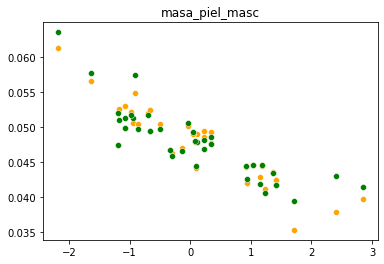

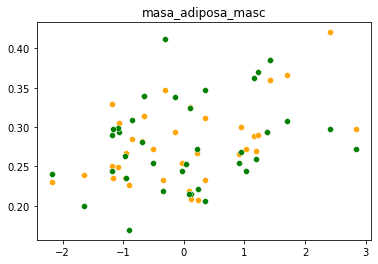

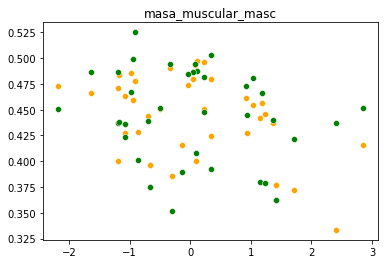

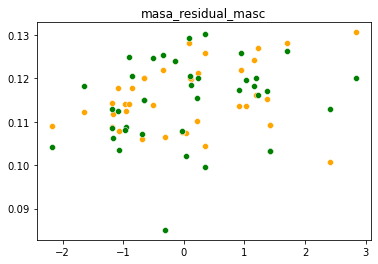

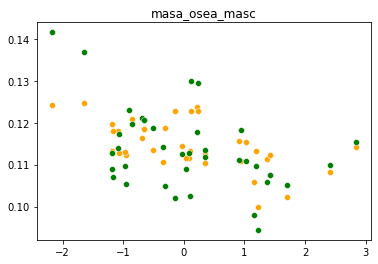

In [40]:
for index,target in enumerate(y_columns):
    model = Ridge(alpha=alphas_m[target])
    model.fit(x_train_m,y_train_m[:,index])

    y_pred = model.predict(x_test_m)

    plt.figure()
    #sns.scatterplot(x=y_test_m[:,index],y=y_pred, color='blue')
    sns.scatterplot(x=x_test_m[:,1],y=y_pred, color='orange')
    sns.scatterplot(x=x_test_m[:,1],y=y_test_m[:,index], color='green')
    plt.title(target+'_masc')
    
    

#### fem

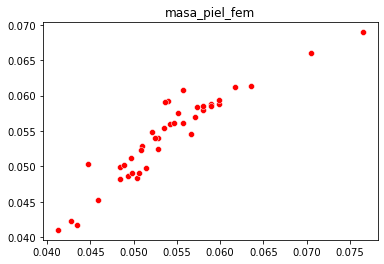

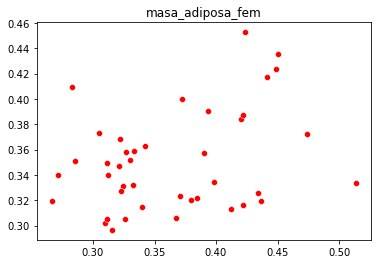

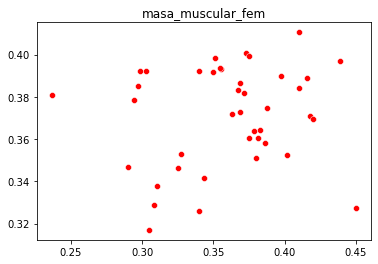

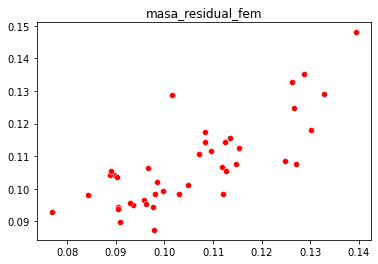

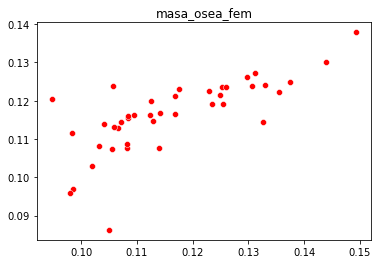

In [41]:
for index,target in enumerate(y_columns):
    model = Ridge(alpha=alphas_f[target])
    model.fit(x_train_f,y_train_f[:,index])

    y_pred = model.predict(x_test_f)

    plt.figure()
    sns.scatterplot(x=y_test_f[:,index],y=y_pred, color='red')
    plt.title(target+'_fem')